In [141]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [142]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')

In [143]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


- Label Encoder()
- Train_test_Split()
- DesicionTreeClassifier(criterion="entrophy",) https://scikit-learn.org/stable/modules/tree.html
- Plot_tree

In [144]:
my_data.shape

(200, 6)

In [145]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [146]:
my_data['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

### Exercise

Build multi- class model for desicion tree and visualize trained dataset


In [147]:
# Identify features and target variable
X = my_data.drop('Drug', axis=1)
y = my_data['Drug'] #Target variable set

#### Label encoder

In [148]:
# Use LabelEncoder for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [149]:

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [150]:
#X

In [151]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [152]:
my_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [153]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Na_to_K             200 non-null    float64
 2   Sex_F               200 non-null    bool   
 3   Sex_M               200 non-null    bool   
 4   BP_HIGH             200 non-null    bool   
 5   BP_LOW              200 non-null    bool   
 6   BP_NORMAL           200 non-null    bool   
 7   Cholesterol_HIGH    200 non-null    bool   
 8   Cholesterol_NORMAL  200 non-null    bool   
dtypes: bool(7), float64(1), int64(1)
memory usage: 4.6 KB


In [154]:
X.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [155]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [156]:
print(X_train.shape)
print(X_test.shape)

(160, 9)
(40, 9)


#### Normalization

In [157]:
""" #from sklearn.preprocessing import StandardScaler to normalization
# Scale the features using StandardScaler
scaler = StandardScaler() #Normalization 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
"""

#Should do I?

' #from sklearn.preprocessing import StandardScaler to normalization\n# Scale the features using StandardScaler\nscaler = StandardScaler() #Normalization \nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n'

##### Fitting and Evaluating the Model

In [158]:
# Build the Decision Tree model
#model = DecisionTreeClassifier(criterion='entropy')
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
""" 
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see tree_mathematical_formulation.
"""

' \ncriterion : {"gini", "entropy", "log_loss"}, default="gini"\n    The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "log_loss" and "entropy" both for the\n    Shannon information gain, see tree_mathematical_formulation.\n'

The model is now trained! We can make predictions on the test dataset, which we can use later to score the model

In [159]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [160]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [161]:
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 1.0

Confusion Matrix:
[[ 3  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



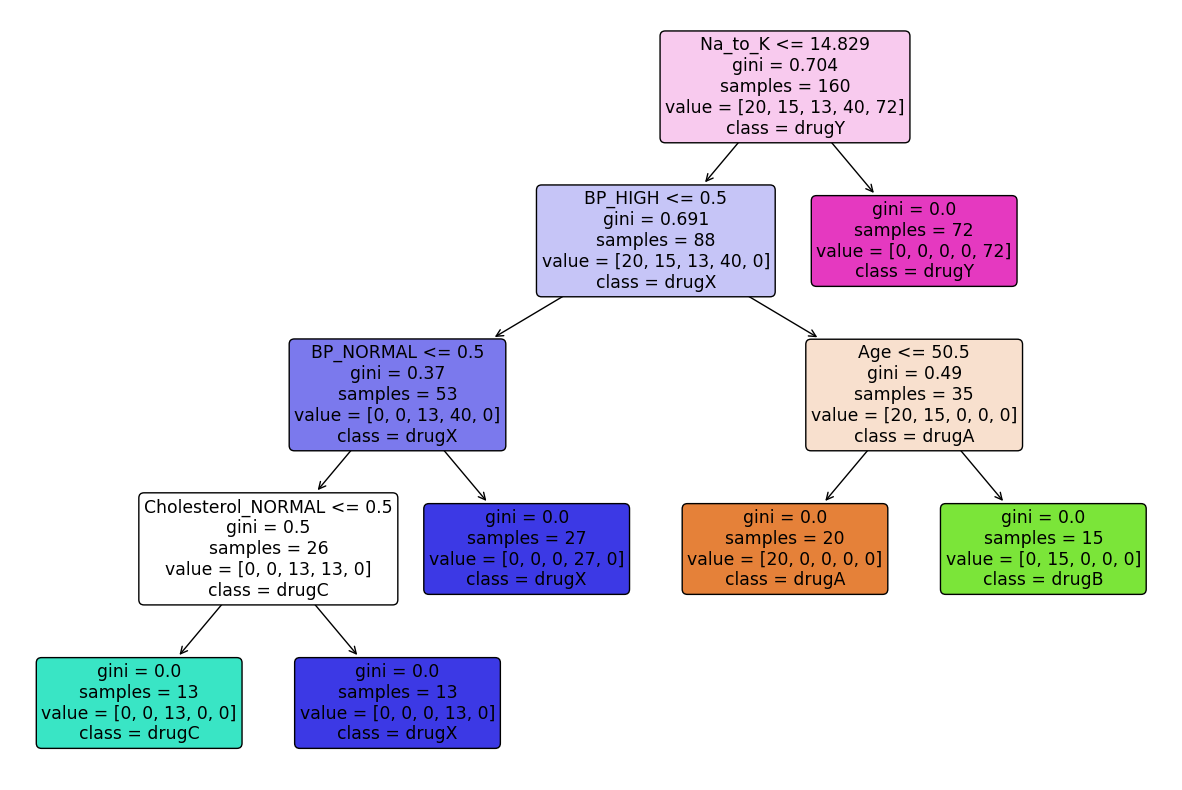

In [162]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()

model = DecisionTreeClassifier(criterion='gini')

model = DecisionTreeClassifier(criterion='entropy')

 **Gini** and **Entropy** refers to the Gini impurity, which is a measure of the impurity or disorder of a set of data points. It is commonly used as a criterion for splitting nodes in a decision tree.
 - A pure node has low entropy and gini